<span style='font-size:xx-large'>**Chapter 6: Eigenstuff \(Eigenvectors, Eigenvalues, Eigenbases, Eigenetc.\)**</span>

<span style='font-size:medium'>by Anna Willis, for Sara Billey's 2024 WXML group.</span>


This part of the tutorial deals _solely_ with eigen\-related Sage functionality, and assumes you are already aware of basic Sage syntax. So if you aren't, then shoo! Off to the previous chapters you go!

If you are confident you know everything about characteristic polynomials, eigenvalues, eigenvectors, eigenbases, and diagonalization, and you just want to see how you can use Sage to calculate the stuff for you, scroll all the way to the final section. If you aren't, though, the rest of this chapter of the tutorial walks through the mathematical process of calculating these things, with some help from SageMath. I have also provided some example questions and solutions to help you on your eigen\-journey.

_Don't code anything you don't understand how to do yourself. You'll regret it when the exams come around! Trust me._ 



<span style='font-size:x-large'>Definition of Eigenvectors and Eigenvalues</span>



Let A be a square\* matrix. A vector\*\* $\overrightarrow{v}$ is an _eigenvector_ of A if and only if there exists some scalar λ such that

$$
A\overrightarrow{v} = \lambda\overrightarrow{v}
$$

Likewise, a scalar λ is an _eigenvalue_ of A if and only if there exists some vector\*\* $\overrightarrow{v}$ for which the above holds.

A useful property that follows from this definition is that all scalar multiples of an eigenvector of A are also eigenvectors of A, with the same eigenvalue λ. Try to prove this for yourself!

\*This is important to remember. Non\-square matrices _do not have eigenvectors/values_. This is because non\-square matrices multiplied by input vectors of the appropriate dimension will not ever produce output vectors of the same dimension as the input. Thus, the output vectors cannot ever be scalar multiples of the input vectors, so there will be no eigenvectors. :frowning: 

\*\*Note that we do not consider the zero vector to be an eigenvector.



<span style='font-size:x-large'>Visual Example of Eigenvectors and Eigenvalues \(with SageMath and pyplot\)</span>



In my opinion, it's easier to understand what an eigenvector is by getting a clear look at it than it is reading a definition. So I'll provide an example with graphs of eigenvectors and eigenvalues, using Sage's built in plot functionality, which is super easy and convenient to use.

Let's start with our beloved unit square. It has corners \(0, 0\), \(0, 1\), \(1, 0\), and \(1, 1\). I'll plot it here:


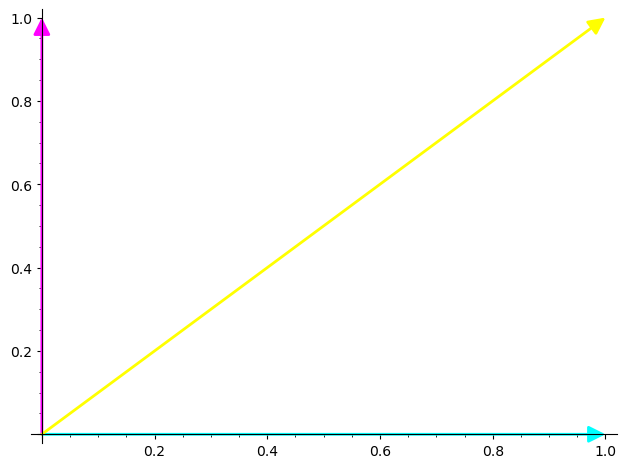

In [11]:
# Create three vectors, each pointing to one nonzero corner of the unit square.
u = vector([0, 1])
v = vector([1, 0])
w = vector([1, 1])

# Define "zero" as the zero vector to make things easier.
zero = vector([0, 0])

# Place the vectors on a plot as arrows, and display.
plot = (arrow(zero, u, color="magenta") + arrow(zero, v, color="cyan") + arrow(zero, w, color="yellow"))
plot.show()

Now, take the linear transformation $T(\overrightarrow{x}) = A\overrightarrow{x}: \mathbb{R^2} \rightarrow \mathbb{R^2}$, defined by the matrix

$A=
  \left[ {\begin{array}{cc}
   1 & 0 \\
   1 & 1 \\
  \end{array} } \right]$



In [12]:
# The QQ before the matrix elements denotes that we're operating in the field of rational numbers.
# If you don't include it, SageMath will default to integers. This doesn't matter that much
# for this specific example, but you should know that.
A = Matrix(QQ, [[1, 0], [1, 1]])
print(A)

[1 0]
[1 1]


I will now apply the linear transformation to the vectors in the unit square, and display the vectors after the transformation:



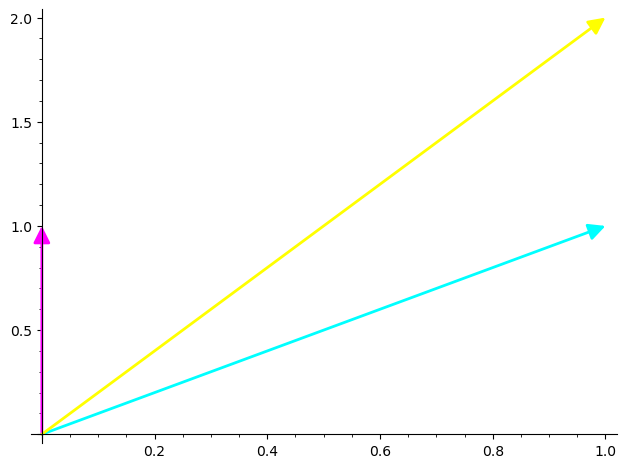

In [36]:
# Apply the linear transformation to each.
Au = A * u
Av = A * v
Aw = A * w

# Place the vectors on a plot as arrows, and display.
plot = (arrow(zero, Au, color="magenta") + arrow(zero, Av, color="cyan") + arrow(zero, Aw, color="yellow"))
plot.show()

Take a look at the vectors before and after applying the linear transformation. The pictures look pretty different. But you'll notice that the magenta vector, pointing to the top left corner of the unit square, remains the same. We can verify this numerically as well:


In [14]:
print("Original vector: %s" % (u))
print("After transformation: %s" % (Au))

Original vector: (0, 1)
After transformation: (0, 1)


Because the magenta vector &lt;0, 1&gt; is the exact same \(scaled by a factor of 1\) following the transformation, it is an eigenvector of the matrix A with the eigenvalue λ = 1. If you came to this tutorial without knowing what eigenvectors are yet, hopefully now you know. And if you came to this tutorial knowing what eigenvectors are... well, I hope you still know. 



<span style='font-size:x-large'>Finding the Characteristic Polynomial and Eigenvalues</span>


As we recall from the definition, a scalar λ is an eigenvalue of a square matrix A if and only if there exists some nonzero vector **v** such that

$A\overrightarrow{v} = \lambda\overrightarrow{v}$

We can do some algebra on this definition to get it into a form more convenient for actually finding these eigenvalues λ.

$A\overrightarrow{v} - \lambda\overrightarrow{v} =\overrightarrow{0}$

$(A-\lambda I)\overrightarrow{v} = \overrightarrow{0}$

Now, this vector $\overrightarrow{v}$cannot be $\overrightarrow{0}$. So, for $(A - λI)\overrightarrow{v} $ to produce $\overrightarrow{0}$, the matrix A \- λ<span style='font-family:Lucida Sans'>I</span> must not be one\-to\-one, as it is guaranteed that $A\overrightarrow{0}$ is always $\overrightarrow{0}$. This means that $det(A - λI) = 0$.

So, $(A-\lambda I)\overrightarrow{v} = \overrightarrow{0}$ if and only if $det(A - λI) = 0$.

This is very handy for finding eigenvalues \- you simply find $det(A - λI)$ and find which λ make it 0. $det(A - λI)$ is also known as the _characteristic polynomial_ of A, which you can use SageMath to find with the charpoly\(\) or fcp\(\) \(Factored Characteristic Polynomial\) function. This returns a string representing the characteristic polynomial of a matrix. Let's take our matrix A from the last section:



In [7]:
# Just to refresh you on what A is.
print("Matrix:")
print(A)

# The .charpoly() function gives you the non-factored characteristic polynomial.
characteristic_polynomial = A.charpoly()
print("Characteristic polynomial: %s" % (characteristic_polynomial))

# The .fcp() function gives you the characteristic polynomial, but factored if possible.
factored_charpoly = A.fcp()
print("Factored characteristic polynomial: %s" % (factored_charpoly))

Matrix:
[1 0]
[1 1]
Characteristic polynomial: x^2 - 2*x + 1


Factored characteristic polynomial: (x - 1)^2


SageMath is a heathen and uses x instead of λ by default. You can provide your own variable name in quotes to the charpoly\(\) or fcp\(\) arguments, like this:


In [9]:
characteristic_polynomial = A.charpoly('λ')
print(characteristic_polynomial)

λ^2 - 2*λ + 1


Setting the characteristic polynomial to 0, we get an equation to find our eigenvalues λ. SageMath can even give you the factored characteristic polynomial, making it even easier to identify the eigenvalues λ. 

We can also use the SageMath solve\(\) function to really spell it out for us \(once again using x instead of λ, because you can't use λ in variable names\):


In [11]:
var(x)
solve(x^2-2*x+1, x)

[x == 1]

We expected to see an eigenvalue 1, as the magenta vector &lt;0, 1&gt; stayed exactly the same following multiplication with A. So, we have confirmed our result from the previous section.

Note that we do indeed list eigenvalues as many times as they appear in the characteristic polynomial. The root λ = 1 appears twice, so we would write the eigenvalues of A as λ = 1, 1.

While we just went through the process of finding the characteristic polynomial, setting it to 0, and solving for the eigenvalues λ, SageMath can just find the eigenvalues for you:



In [12]:
eigenvalues = A.eigenvalues()
print(eigenvalues)

[1, 1]


The eigenvalues\(\) function returns all of A's eigenvalues in an unsorted list, including repeats. Simple enough.


<span style='font-size:x-large'>Practice Problem 1: Characteristic Polynomials and Eigenvalues</span>


Find the characteristic polynomial and eigenvalues of this matrix:

$M =\left[ {\begin{array}{cc}
5 & 6 \\
0 & 2 \\
\end{array} } \right]$

Run the code below to check your answers, and look at the solution below for an explanation of the calculations.


In [12]:
M = Matrix(QQ, [[5, 6], [0, 2]])
print("Characteristic Polynomial (default in terms of x): %s" % (M.fcp()))
print("Eigenvalues: %s" % (M.eigenvalues()))

Characteristic Polynomial (default in terms of x): (x - 5) * (x - 2)
Eigenvalues: [5, 2]


**SOLUTION**

The characteristic polynomial of a matrix M is $det(M-λI)$.

$M - \lambda I  =\left[ {\begin{array}{cc}
5 & 6 \\
0 & 2 \\
\end{array} } \right] - \left[ {\begin{array}{cc}
\lambda & 0 \\
0 & \lambda \\
\end{array} } \right] = \left[ {\begin{array}{cc}
5 - \lambda & 6 \\
0 & 2 - \lambda \\
\end{array} } \right]$

$det(M-\lambda I) = det(\left[ {\begin{array}{cc}
5 - \lambda & 6 \\
0 & 2 - \lambda \\
\end{array} } \right]) = (5-\lambda)(2-\lambda) - (6)(0) = (5-\lambda)(2-\lambda)$

So, the characteristic polynomial of M is $(5-λ)(2-λ)$.

This is a nice characteristic polynomial. Set it to 0 to get your eigenvalues λ:

$(5-λ)(2-λ) = 0$

$λ=5, λ=2$



<span style='font-size:x-large'>Finding Eigenvectors</span>



Once you have the eigenvalues λ, it's simple to find the corresponding eigenvectors. You just need to find the vector $\overrightarrow{v}$ for your eigenvalue λ such that

$(A - λI)\overrightarrow{v} = \overrightarrow{0} $ .

This entails solving a system of linear equations. We know how to do that.

Let's take our matrix A and its only eigenvalue λ = 1, and compute A \- λ<span style='font-family:Lucida Sans'>I</span> first:



In [83]:
# matrix.identity(d) returns the identity matrix with d rows and d columns.
A_minus_lambda_I = A - matrix.identity(2)
print(A_minus_lambda_I)

[0 0]
[1 0]


Looking at the matrix

$A - λI = \left[ {\begin{array}{cc}
1 & 0 \\
1& 1 \
\end{array} } \right]-I = \left[ {\begin{array}{cc}
0 & 0 \\
1& 0 \
\end{array} } \right]$,

we can see that vectors $\overrightarrow{v}$ that satisfy $(A - λI)\overrightarrow{v} = \overrightarrow{0}$ need only have a 0 as their first coordinate. So, the eigenvectors are of the form s&lt;0, 1&gt; where s is a scalar. This again checks out with what we saw visually, with &lt;0, 1&gt; staying the same before and after the transformation, and all scalar multiples of eigenvectors being eigenvectors themselves.

But if this were more complicated a system, or if you're lazy, SageMath can help:



In [84]:
zero_vector = vector([0, 0])
# M.solve_right(some_vector) returns a vector or matrix X such that MX = some_vector.
# M.solve_left(some_vector) would return a vector or matrix X such that MA = some_vector. We don't want that here.
eigenvectors = A_minus_lambda_I.solve_right(zero_vector)
print(eigenvectors)

(0, 0)


As you can see, though, you shouldn't let SageMath's solve\_right\(\) be the final word. While the vector &lt;0, 0&gt; does indeed satisfy this system \- as it should, because any matrix multiplied by the zero vector will produce the zero vector \- it's not the answer we're looking for. What you really want to ask SageMath for is the _kernel_ of $A - λI$, or the set of vectors **v** that satisfy $(A - λI)\overrightarrow{v} = \overrightarrow{0}$.


In [85]:
# Once again, there's also a left_kernel(), but we are looking for vectors multiplied to the right of A that produce the zero vector.
kernel = A_minus_lambda_I.right_kernel()
print(kernel)

Vector space of degree 2 and dimension 1 over Rational Field
Basis matrix:
[0 1]


And there you have it. The basis for A's eigenvectors with eigenvalue λ = 1 is {&lt;0, 1&gt;}.

Instead of going through all of these steps, you could just ask SageMath for the eigenvectors with the eigenvectors\(\) function:



In [86]:
# Once again once again, there's also an eigenvectors_left(), but we don't want that here.
# Generally, if it's a problem in Math 208 that you're working on, you'll want to be using the _right()
# versions of all the matrix functions. I can't think of a time where I needed to find the left eigenvectors in 208.
eigenvectors = A.eigenvectors_right()
print(eigenvectors)

[(1, [
(0, 1)
], 2)]


The output of the eigenvectors\_right\(\) and \_left\(\) functions is an array of triples. Each triple is of the form \(eigenvalue λ, list containing an eigenvector for that eigenvalue λ, multiplicity\). A's only eigenvalue is λ = 1, an eigenvector for λ = 1 is &lt;0, 1&gt;, and the eigenvalue λ = 1 appeared 2 times as a root of A's characteristic polynomial set to 0. So SageMath gives us \[\(1, \[\(0, 1\)\], 2\].


<span style='font-size:x-large'>Practice Problem 2: Finding Eigenvectors</span>


Find the eigenvectors of this matrix:

$M =\left[ {\begin{array}{cc}
5 & 6 \\
0 & 2 \\
\end{array} } \right]$

Recall that you already found the eigenvalues of this matrix in the previous practice problem: λ = 5, 2.

Run the code below to check your answer, and look at the solution below for a more detailed explanation.


In [15]:
print(M.eigenvectors_right())

[(5, [
(1, 0)
], 1), (2, [
(1, -1/2)
], 1)]


**SOLUTION**

To find the eigenvectors of M corresponding to λ = 5, find the vectors $\overrightarrow{v}$ that satisfy this equation:

$(M-5I)\overrightarrow{v} = \overrightarrow{0}$ .

$(M-5I)\overrightarrow{v}=(\left[ {\begin{array}{cc}
5 & 6 \\
0 & 2 \\
\end{array} } \right] - \left[ {\begin{array}{cc}
5 & 0 \\
0 & 5 \\
\end{array} } \right])\overrightarrow{v} = \left[ {\begin{array}{cc}
0 & 6 \\
0 & -3 \\
\end{array} } \right]\overrightarrow{v} =\overrightarrow{0}$

It's clear to see that any vector with a second coordinate of 0 will satisfy this equation, and thus be an eigenvector with eigenvalue 5. A good example is &lt;1, 0&gt;.

To find the eigenvectors of M corresponding to λ = 2, find the vectors $\overrightarrow{v}$ that satisfy this equation:

$(M-2I)\overrightarrow{v} = \overrightarrow{0}$

$(M-5I)\overrightarrow{v}=(\left[ {\begin{array}{cc}
5 & 6 \\
0 & 2 \\
\end{array} } \right] - \left[ {\begin{array}{cc}
2 & 0 \\
0 & 2 \\
\end{array} } \right])\overrightarrow{v} = \left[ {\begin{array}{cc}
3 & 6 \\
0 & 0 \\
\end{array} } \right]\overrightarrow{v} =\overrightarrow{0}$

So, any scalar multiple of the vector &lt;2, \-1&gt; will be an eigenvector with eigenvalue 2.



<span style='font-size:x-large'>Finding Eigenbases</span>



As usual, I'll start off with a quick definition.

Let A be a square matrix of dimensions n x n. An eigenbasis is a basis of $\mathbb{R^n}$ consisting of eigenvectors of A.

Eigenvectors with different eigenvalues are always linearly independent. This is, as previously mentioned, because all scalar multiples of an eigenvector with eigenvalue λ will also have eigenvalue λ. So, if A has n distinct eigenvalues, A will also have an eigenbasis of $\mathbb{R^n}$.

Let's take the matrix A we have been using this whole time:



In [87]:
# Just so you remember what it is.
print(A)
print("Eigenvalues: %s" % (A.eigenvalues()))

[1 0]
[1 1]
Eigenvalues: [1, 1]


We can't get an eigenbasis from A. It only has one distinct eigenvalue, λ = 1.

So goodbye A, and onto our new matrix $B = \left[ {\begin{array}{cc}
3& 2 \\
1 & 4 \
\end{array} } \right]$:


In [19]:
B = Matrix(QQ, ([3, 2], [1, 4]))
print(B)

[3 2]
[1 4]


B is a 2x2 matrix. So to get an eigenbasis from B, B needs to have 2 distinct eigenvalues. Let's verify that it does:


In [20]:
eigenvalues = B.eigenvalues()
print(eigenvalues)

[5, 2]


5 and 2 are indeed different numbers \(bet you didn't know that\), so we can get an eigenbasis from B. Let's get its eigenvectors:


In [21]:
eigenvectors = B.eigenvectors_right()
print(eigenvectors)

[(5, [
(1, 1)
], 1), (2, [
(1, -1/2)
], 1)]


The eigenvalue λ = 5 has eigenvectors of form s&lt;1, 1&gt;, and λ = 2 has eigenvectors of form t&lt;1, \-1/2&gt;, where s and t are scalars. Let's get the eigenbasis matrix:


In [22]:
# A helper function to find a matrix's eigenbasis matrix, if it exists.
# If it doesn't exist (the matrix is not a square matrix or
# it does not have enough distinct eigenvalues), throws an Exception.
def get_eigenbasis_matrix(matrix):
    num_rows = matrix.nrows()
    num_cols = matrix.ncols()
    if (num_rows != num_cols):
        raise Exception("not a square matrix! no eigenvectors at all :(")
    eigenvectors_and_values = matrix.eigenvectors_right()
    if (len(eigenvectors_and_values) != num_rows):
        raise Exception("cannot find an eigenbasis for R_%s! there aren't %s distinct eigenvalues" % (num_rows, num_rows))
    eigenvectors_list = []
    for i in range(num_rows):
        # Let's brush up on our zero-based indexing.
        # Sage gave us a list of triples (eigenvalue, [eigenvector], multiplicity).
        # So to get the ith eigenvector, we look at the ith entry in the list,
        # the second (1) entry in the tuple, and the first (0) and only entry in the vector list.
        vector = eigenvectors_and_values[i][1][0]
        eigenvectors_list.append(vector)
    # The eigenbasis matrix's columns are the matrix's eigenvectors.
    # I cannot simply do Matrix(QQ, (eigenvectors_list)) - this would insert the vectors as rows.
    eigenbasis_row_list = [] 
    for i in range(num_rows):
        row = []
        for j in range(num_rows):
            row.append(eigenvectors_list[i][j])
        eigenbasis_row_list.append(row)
    eigenbasis_matrix = Matrix(QQ, eigenbasis_row_list)
    return eigenbasis_matrix

eigenbasis_matrix = get_eigenbasis_matrix(B)
print(eigenbasis_matrix)

[   1    1]
[   1 -1/2]


There's another way to obtain the eigenbasis matrix with built\-in Sage functionality that I'll go over in the next section, on diagonalization. I think it's important conceptually to think about the process of finding the eigenbasis, though, as outlined in my helper function get\_eigenbasis\_matrix\(\).



<span style='font-size:x-large'>Diagonalization</span>



Firstly, a matrix is a _diagonal_ matrix if all of its entries are 0 except for those along the diagonal. Here's an example of a diagonal matrix:

$$
\left[ {\begin{array}{ccc}
5 & 0 & 0 \\
0 & 8 & 0 \\
0 & 0 & 3\
\end{array} } \right]
$$



A matrix M is _diagonalizable_ if there exist some invertible matrix P and some diagonal matrix D such that this is true:

$$
M = PDP^{-1}
$$



You may be wondering why this is important or useful. Well, diagonalizing a matrix makes it much easier to raise to a power. Raise a diagonalizable matrix M to the third power, for example:


$$
M = PDP^{-1} \newline
M^3 = (PDP^{-1})^3 \newline
= (PDP^{-1})(PDP^{-1})(PDP^{-1}) \newline
= PDP^{-1}PDP^{-1}PDP^{-1} \newline
= PD(P^{-1}P)D(P^{-1}P)DP^{-1} \newline
= PD^{3}P^{-1}
$$



More generally, all of the P and P\-inverses in the middle cancel out, meaning that:


$$
M^n = PD^nP^{-1}
$$



Now let's get into how to diagonalize a matrix M. This means identifying the matrix P and the diagonal matrix D.

P is an eigenbasis matrix of M. So if you can't get an eigenbasis from M, M is not diagonalizable. 

We don't have to worry about P being invertible, because as we know, the eigenbasis matrix comprises M's _linearly independent_ eigenvectors, and thus by the Unifying Theorem it is invertible.

For the matrix B we've been using:



In [23]:
# Note that get_eigenbasis_matrix() is a function I defined in the last section. It is not built into Sage.
# We'll get to the built-in Sage diagonalization functionality soon.
P = get_eigenbasis_matrix(B)
print(P)

[   1    1]
[   1 -1/2]


The diagonal matrix D has the eigenvalues corresponding to the eigenvectors in P as the elements on the diagonal. The eigenvalue associated with B's eigenvector &lt;1, 1&gt; \(first column of P\) is λ = 5, so the first element in D's diagonal is 3. The eigenvalue associated with B's eigenvector &lt;1, \-1/2&gt; \(second column of P\) is 2, so the second element in D's diagonal is 2.


In [25]:
D = Matrix(QQ, ([5, 0], [0, 2]))
print(D)

[5 0]
[0 2]


To verify that this is indeed the correct diagonalization of B, let's use SageMath to multiply out PDP^\-1.


In [26]:
print("Original Matrix B")
print(B)
print("\nPDP^-1 = ")
# The .inverse() function calculates the inverse of a matrix. Pretty self-explanatory.
print(P*D*P.inverse())

Original Matrix B
[3 2]
[1 4]

PDP^-1 = 
[3 2]
[1 4]


So, we've got it!

Of course, you can use SageMath to skip this whole process. But you should understand the process before you wave your hands around and have Sage do it for you.


In [27]:
diagonalization = B.eigenmatrix_right()
print(diagonalization)

([5 0]
[0 2], [   1    1]
[   1 -1/2])


This returns a tuple, in which each entry is a matrix. The first matrix \(element 0 in the tuple\) is D, and the second matrix \(element 1 in the tuple\) is P.

So, our own diagonalization is correct, at least according to Sage.

Note that there is another possible diagonalization for B, if you switched the order of the eigenvectors/values. SageMath only gives you one of the options, but this is totally fine too:


In [29]:
alternate_D = Matrix(QQ, ([2, 0], [0, 5]))
alternate_P = Matrix(QQ, ([1, 1], [-0.5, 1]))
print("Other option for diagonal matrix D:")
print(alternate_D)
print("\nOther option for matrix P:")
print(alternate_P)
print("\nPDP^-1 = ")
print(alternate_P*alternate_D*alternate_P.inverse())

Other option for diagonal matrix D:
[2 0]
[0 5]

Other option for matrix P:
[   1    1]
[-1/2    1]

PDP^-1 = 
[3 2]
[1 4]


Before you try and diagonalize a matrix, you can also check if it's diagonalizable with SageMath:


In [30]:
print("B is diagonalizable (should be True): %s" % (B.is_diagonalizable()))
print("A is diagonalizable (should be False): %s" % (A.is_diagonalizable()))

B is diagonalizable (should be True): True
A is diagonalizable (should be False): False


<span style='font-size:x-large'>Quick Review of Eigen\-related Sage Functionality</span>


In [31]:
# Define a 3x3 matrix over the rational field (QQ).
C = Matrix(QQ, ([-2, -4, 2], [-2, 1, 2], [4, 2, 5]))
print(C)

[-2 -4  2]
[-2  1  2]
[ 4  2  5]


In [32]:
# Find a matrix's characteristic polynomial.
# Pass a string with your preferred variable name to the function to
# receive the characteristic polynomial in terms of that variable name.
print(C.charpoly('t'))

# If you don't pass in a variable name, Sage defaults to x.
print(C.charpoly())

# Use .fcp() to find the factored characteristic polynomial of a matrix.
# You can provide a variable name to this function too.
print(C.fcp('y'))

t^3 - 4*t^2 - 27*t + 90
x^3 - 4*x^2 - 27*x + 90
(y - 6) * (y - 3) * (y + 5)


In [33]:
# Find the eigenvalues of a matrix.
print(C.eigenvalues())

# eigenvalues() returns an unordered list containing all eigenvalues of the matrix,
# including repeats.

[6, 3, -5]


In [34]:
# Find the eigenvectors of a matrix.
# C.eigenvectors_right() returns vectors v such that Cv = λv.
# ^ You'll generally want to use this one, at least in 208.
# C.eigenvectors_left() returns vectors v such that vC = λv.
print(C.eigenvectors_right())

# The eigenvectors function returns a list of triples. The triples are of this form:
# (eigenvalue, list containing the associated eigenvector, multiplicity i.e. how many
# times the eigenvalue appeared as a root of the characteristic polynomial).

[(6, [
(1, 6, 16)
], 1), (3, [
(1, -3/2, -1/2)
], 1), (-5, [
(1, 1/2, -1/2)
], 1)]


In [35]:
# Find, if possible, a diagonal matrix D and an invertible matrix P such that
# C = PDP^-1 (diagonalize C).
# Once again, there is also an eigenmatrix_left().
print(C.eigenmatrix_right())

# The eigenmatrix function returns a tuple containing a diagonal matrix D
# and an invertible matrix P to diagonalize the matrix. Note that Sage only
# returns one possible diagonalization.

# D contains the matrix's eigenvalues on its diagonal, and P is one possible eigenbasis,
# with each of its columns being the eigenvector corresponding to the eigenvalue in its column
# in D.

([ 6  0  0]
[ 0  3  0]
[ 0  0 -5], [   1    1    1]
[   6 -3/2  1/2]
[  16 -1/2 -1/2])


<span style='font-size:x-large'>That's all! Happy coding, linear algebra\-ing, and eigen\-ing!</span>
